<a href="https://colab.research.google.com/github/wesleybeckner/data_science_foundations/blob/main/notebooks/solutions/L1_Descriptive_Statistics_Data_Hunt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Foundations, Lab 1: Data Hunt I

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

---

<br>

That's right you heard correctly. It's a data hunt.

<br>

---




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/wesleybeckner/"\
  "technology_explorers/main/assets/imdb_movies.csv")

# converting years to numbers for easy conditionals
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df.shape

/home/wbeckner/anaconda3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(85855, 22)

In [4]:
df.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894.0,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906.0,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911.0,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0


# Q1 What american director has the highest mean  avg_vote?

In [5]:
df.groupby('director')['avg_vote'].mean().sort_values(ascending=False)

director
Msn Surya            9.9
Aalmist Subba        9.8
Sampath Rudra        9.8
Basheed S.K.         9.8
Abner Official       9.8
                    ... 
Ramana Reddy B.V.    1.0
Tamás Gerencsér      1.0
Tommy Yu             1.0
Gökhan Gök           1.0
Yasutake Torii       1.0
Name: avg_vote, Length: 34733, dtype: float64

# Q2 What american director with more than 5 movies, has the highest mean avg_vote?

In [ ]:
df.groupby('director').filter(lambda x: x.shape[0] > 5).\
  groupby('director')['avg_vote'].mean().sort_values(ascending=False)

director
Christopher Nolan     8.218182
Satyajit Ray          8.025000
Andrei Tarkovsky      8.014286
Hayao Miyazaki        8.008333
Sergio Leone          7.928571
                        ...   
Bill Zebub            2.483333
Mark Polonia          2.433333
Paul T.T. Easter      2.383333
Christopher Forbes    2.000000
Brett Kelly           1.533333
Name: avg_vote, Length: 3047, dtype: float64

# Q3 What director has the largest variance in avg_vote?

In [ ]:
df.groupby('director')['avg_vote'].std().sort_values(ascending=False)

director
Deniz Denizciler              4.030509
Rudi Lagemann                 3.747666
Emilio Ruiz Barrachina        3.676955
Krishna Ghattamaneni          3.676955
Milos Avramovic               3.606245
                                ...   
Ümit Degirmenci                    NaN
Ümit Elçi                          NaN
Ümit Köreken                       NaN
Þorsteinn Gunnar Bjarnason         NaN
Þórhildur Þorleifsdóttir           NaN
Name: avg_vote, Length: 34733, dtype: float64

# Q4 What director with more than 10 movies has the largest variance in avg_vote?

In [ ]:
df.groupby('director').filter(lambda x: x.shape[0] > 10).\
  groupby('director')['avg_vote'].std().sort_values(ascending=False)

director
Harry Baweja         1.869954
Shaji Kailas         1.854502
Zdenek Troska        1.775984
Adam Rifkin          1.711251
Ram Gopal Varma      1.687850
                       ...   
Ford Beebe           0.224343
Ray Nazarro          0.210311
Jean Grémillon       0.196946
Louis Feuillade      0.156428
Tsutomu Shibayama    0.126121
Name: avg_vote, Length: 1135, dtype: float64

# Q5 What american directors with more than 5 movies have the largest variance in avg_vote?

In [ ]:
df.groupby('director').filter(lambda x: x.shape[0] > 5).\
  groupby('director')['avg_vote'].std().sort_values(ascending=False)

director
Jorge Ameer          2.200606
Tigran Keosayan      2.188150
Nikos Zervos         2.093243
Kundan Shah          2.060502
Feroz Khan           2.036220
                       ...   
Sang-il Lee          0.132916
Nate Watt            0.129099
Daisuke Nishio       0.127242
Tsutomu Shibayama    0.126121
Pierre Chenal        0.103280
Name: avg_vote, Length: 3047, dtype: float64

# Q6 Where does M. Night Shyamalan fall on this rank scale?

(He's number 36/859)

In [ ]:
var_rank = df.loc[df['country'] == 'USA'].groupby('director').filter(lambda x: x.shape[0] > 5).\
  groupby('director')['avg_vote'].std().sort_values(ascending=False).reset_index()
display(var_rank.loc[var_rank['director'] == 'M. Night Shyamalan'])
print(var_rank.shape[0])

,director,avg_vote
36,M. Night Shyamalan,1.258791


859


what happens when you only include directors who, on average (based on mean), have made most their movies after 1990 and have produced 10 or more movies?

(Shyamalan rises to 3/83)

In [50]:
var_rank = df.loc[df['country'] == 'USA']\
    .groupby('director').filter(lambda x: (x['year'].mean() > 1990) & (x.shape[0] > 9))\
    .groupby('director')[['avg_vote', 'votes']].describe().sort_values(by=('avg_vote', 'std'), ascending=False)

display(var_rank.iloc[:10])
print(var_rank.shape[0])

avg_vote                                                    \
                      count      mean       std  min    25%   50%    75%  max   
director                                                                        
Adam Rifkin            15.0  5.053333  1.711251  1.3  4.200  5.80  6.100  6.9   
Mark L. Lester         19.0  4.768421  1.262296  2.3  4.200  4.70  5.800  6.7   
M. Night Shyamalan     10.0  5.970000  1.258791  4.0  4.975  6.05  6.650  8.1   
Sean McNamara          12.0  5.216667  1.252513  2.9  4.725  5.60  5.950  7.0   
Sam Firstenberg        10.0  4.550000  1.174970  2.8  3.475  4.85  5.325  6.2   
Gus Van Sant           12.0  6.583333  1.169952  4.4  6.025  6.95  7.300  8.3   
John Lyde              16.0  4.937500  1.159813  3.6  3.900  4.80  5.500  7.0   
Michael Polish         12.0  5.458333  1.154011  3.4  4.700  5.45  6.300  7.2   
Randal Kleiser         12.0  5.708333  1.126102  3.5  5.050  5.60  6.750  7.2   
Brian Brough           12.0  5.575000  1.096378  3.5  5.225  5.80  6.350  7.0   

                   votes                                                  \
                   count           mean            std     min       25%   
director                                                                   
Adam Rifkin         15.0    4417.400000    9414.430237   124.0    525.50   
Mark L. Lester      19.0   11479.052632   32768.240173   298.0    549.00   
M. Night Shyamalan  10.0  239264.500000  262079.154005   731.0  97982.50   
Sean McNamara       12.0    9221.166667   13933.853515   365.0   1085.25   
Sam Firstenberg     10.0    1890.400000    1552.704107   153.0    713.50   
Gus Van Sant        12.0  112868.166667  232569.906962  3674.0  16191.75   
John Lyde           16.0    1021.937500     911.075516   113.0    409.50   
Michael Polish      12.0    4396.833333    5662.740034   528.0   1698.75   
Randal Kleiser      12.0   35908.916667   65204.420315  1030.0   2458.75   
Brian Brough        12.0     675.500000     590.071721   104.0    134.00   

                                                   
                         50%        75%       max  
director                                           
Adam Rifkin           1084.0    1782.50   34958.0  
Mark L. Lester        1219.0    4405.50  143443.0  
M. Night Shyamalan  169426.0  308493.25  894385.0  
Sean McNamara         1416.0   12191.50   44808.0  
Sam Firstenberg       1282.0    3317.25    4330.0  
Gus Van Sant         38458.5   82270.25  837379.0  
John Lyde              802.0    1360.00    3270.0  
Michael Polish        3395.5    3624.00   21873.0  
Randal Kleiser       11245.5   41162.50  232940.0  
Brian Brough           606.5    1048.75    1842.0

83


In [49]:
var_rank = df.loc[df['country'] == 'USA']\
    .groupby('director').filter(lambda x: (x['avg_vote'].max() > 8) & (x['votes'].mean() > 1e3) & (x.shape[0] > 2))\
    .groupby('director')[['avg_vote', 'votes']].describe().sort_values(by=('avg_vote', 'std'), ascending=False)

display(var_rank.iloc[:10])
print(var_rank.shape[0])

avg_vote                                               \
                        count      mean       std  min    25%   50%    75%   
director                                                                     
Peter Bogdanovich        13.0  6.446154  1.564510  2.9  6.000  7.00  7.600   
Francis Ford Coppola     18.0  6.777778  1.444077  3.1  6.225  6.65  7.550   
Richard Marquand          5.0  6.320000  1.375500  4.5  5.800  6.50  6.500   
Curtis Hanson             6.0  6.150000  1.361984  4.3  5.350  6.40  6.550   
Sean Penn                 4.0  6.525000  1.322561  4.9  5.950  6.55  7.125   
Timothy A. Chey           6.0  6.250000  1.291124  4.4  5.775  6.05  6.850   
M. Night Shyamalan       10.0  5.970000  1.258791  4.0  4.975  6.05  6.650   
Stanley Kubrick           5.0  7.280000  1.202913  5.5  6.600  7.90  8.000   
Gus Van Sant             12.0  6.583333  1.169952  4.4  6.025  6.95  7.300   
Frank Darabont            4.0  7.975000  1.164403  6.9  7.050  7.85  8.775   

                          votes                                        \
                      max count           mean           std      min   
director                                                                
Peter Bogdanovich     8.1  13.0   12023.307692  1.510756e+04    870.0   
Francis Ford Coppola  9.2  18.0  226387.555556  4.392702e+05    199.0   
Richard Marquand      8.3   5.0  188499.800000  4.134480e+05    411.0   
Curtis Hanson         8.2   6.0  100734.333333  2.069594e+05    209.0   
Sean Penn             8.1   4.0  157547.000000  2.695851e+05   4409.0   
Timothy A. Chey       8.2   6.0    1447.500000  5.878295e+02    788.0   
M. Night Shyamalan    8.1  10.0  239264.500000  2.620792e+05    731.0   
Stanley Kubrick       8.4   5.0   80954.400000  6.855686e+04   9649.0   
Gus Van Sant          8.3  12.0  112868.166667  2.325699e+05   3674.0   
Frank Darabont        9.3   4.0  929718.000000  1.008586e+06  51763.0   

                                                                  
                            25%       50%         75%        max  
director                                                          
Peter Bogdanovich       1262.00    2426.0    19253.00    41283.0  
Francis Ford Coppola    5078.25   23681.5   164311.25  1572674.0  
Richard Marquand         560.00     598.0    12894.00   928036.0  
Curtis Hanson           1345.00   20931.0    39724.25   521530.0  
Sean Penn              10514.00   32543.5   179576.50   560692.0  
Timothy A. Chey          923.50    1510.5     1812.50     2235.0  
M. Night Shyamalan     97982.50  169426.0   308493.25   894385.0  
Stanley Kubrick        20806.00   79652.0   121994.00   172671.0  
Gus Van Sant           16191.75   38458.5    82270.25   837379.0  
Frank Darabont        219886.75  694132.0  1403963.25  2278845.0

66


# Q7 How many movies were made each year in US from 2000-2020

In [75]:
df.loc[(df['year'] >= 2000) & (df['year'] <= 2020)][['year']].value_counts(sort=False)

year  
2000.0    1345
2001.0    1447
2002.0    1405
2003.0    1496
2004.0    1681
2005.0    1827
2006.0    2063
2007.0    2074
2008.0    2175
2009.0    2298
2010.0    2281
2011.0    2429
2012.0    2560
2013.0    2783
2014.0    2942
2015.0    2977
2016.0    3138
2017.0    3329
2018.0    3257
2019.0    2841
2020.0     789
dtype: int64

# Q8 Visualize The Results of Q7!

<AxesSubplot:xlabel='year'>

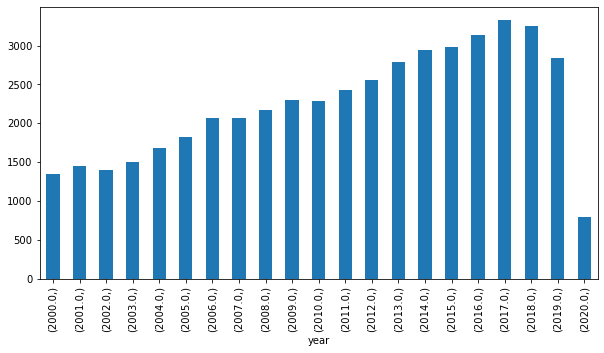

In [76]:
fig, ax = plt.subplots(figsize=(10,5))
df.loc[(df['year'] >= 2000) & (df['year'] <= 2020)][['year']].value_counts(sort=False).plot(kind='bar', ax=ax)

# Q9 For single country movies, how many movies were made each year in each country from 2000-2020, only include countries that made more than 1000 movies in that timeframe

In [92]:
df.loc[(df['year'] >= 2000) & (df['year'] <= 2020) & (~df['country'].str.contains(',', na=False))]\
  .groupby('country').filter(lambda x: x.shape[0] > 1000)\
  .groupby(['country', 'year'])[['title']].count().reset_index()

,country,year,title
0,Canada,2000.0,39
1,Canada,2001.0,51
2,Canada,2002.0,49
3,Canada,2003.0,38
4,Canada,2004.0,52
...,...,...,...
163,USA,2016.0,869
164,USA,2017.0,905
165,USA,2018.0,886
166,USA,2019.0,700


# Q10 Visualize the results from Q9!

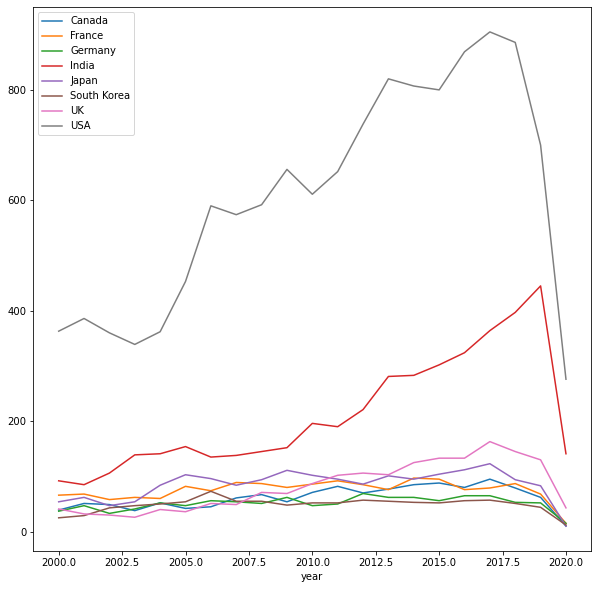

In [103]:
fig, ax = plt.subplots(figsize=(10,10))
countries = df.loc[(df['year'] >= 2000) & (df['year'] <= 2020) & (~df['country'].str.contains(',', na=False))]\
  .groupby('country').filter(lambda x: x.shape[0] > 1000)\
  .groupby(['country', 'year'])[['title']].count().reset_index()

for country in countries.groupby('country'):
    country[1].plot(x='year', y='title', ax=ax, label=country[0])
